In [2]:
import pandas as pd
import os
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = './data'
list_name = 'Stock_List.csv'
stock_list = pd.read_csv(os.path.join(path,list_name))
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list.sort_values(by='종목코드',ascending=True)

,종목명,종목코드,상장시장
109,메리츠화재,000060,KOSPI
126,하이트진로,000080,KOSPI
67,유한양행,000100,KOSPI
69,CJ대한통운,000120,KOSPI
156,두산,000150,KOSPI
...,...,...,...
328,넥스틴,348210,KOSDAQ
31,하이브,352820,KOSPI
199,솔브레인,357780,KOSDAQ
176,티와이홀딩스,363280,KOSPI


In [8]:
start_date = '20190101'
end_date = '20201231'
sample_code = '005930'
stock = fdr.DataReader(sample_code, start = start_date, end = end_date)
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


In [9]:
stock.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

In [11]:
print(f'prev : {stock.columns}')
# stock.reset_index(inplace=True) 
print(f'post : {stock.columns}')
# pd.to_datetime(stock['Date'])

prev : Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')
post : Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')


In [12]:
stock.dtypes

Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object

In [26]:
stock_numpy = stock.to_numpy()

In [55]:
# date 살려서 plot 그리기


In [29]:
from sklearn.model_selection import train_test_split
stock_x = stock.drop('Close', axis=1)
stock_y = stock['Close'].copy()
# x_train, x_test, y_train, y_test = train_test_split(stock_x, stock_y, test_size=0.33)
stock_x_np = stock_x.to_numpy()
stock_y_np = stock_y.to_numpy()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [35]:
#kfold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
cv_accuracy = []

In [36]:
n_iter = 0
for train_index, test_index in kfold.split(stock_x_np):
    # print(f'train_index : {train_index}')
    # print(f'test_index : {test_index}')
    # print('==================================================')

    x_train, x_test = stock_x_np[train_index], stock_x_np[test_index]
    y_train, y_test = stock_y_np[train_index], stock_y_np[test_index]

    lin_reg.fit(x_train, y_train)
    fold_pred = lin_reg.predict(x_test)

    n_iter += 1
    accuracy = np.mean(abs(y_test - fold_pred)/y_test) * 100
    print(f'{n_iter} 교차검증 정확도 : {accuracy}, 학습 데이터 크기 : {x_train.shape[0]}, 검증 데이터 크기 : {x_test.shape[0]}')

    cv_accuracy.append(accuracy)
print('\n')

print(f'평균 검증 정확도 : {np.mean(cv_accuracy)}')


1 교차검증 정확도 : 0.385575318779606, 학습 데이터 크기 : 395, 검증 데이터 크기 : 99
2 교차검증 정확도 : 0.3793535336652, 학습 데이터 크기 : 395, 검증 데이터 크기 : 99
3 교차검증 정확도 : 0.37362576817313936, 학습 데이터 크기 : 395, 검증 데이터 크기 : 99
4 교차검증 정확도 : 0.41298527939826807, 학습 데이터 크기 : 395, 검증 데이터 크기 : 99
5 교차검증 정확도 : 0.42707138199124484, 학습 데이터 크기 : 396, 검증 데이터 크기 : 98


평균 검증 정확도 : 0.3957222564014916


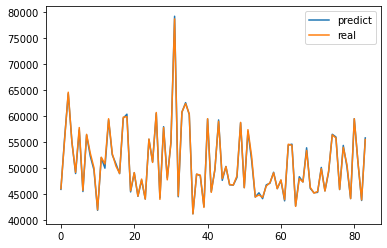

In [22]:
# 결과 시각화
# plt.plot(y_predict[80:], label='predict')
# plt.plot(y_test[80:].values.reshape(-1,1), label='real')
# plt.legend()